# Práctica Final de NLP

## 1. Descarga y exploración del corpus

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* En un principio descargamos una base de datos de 10.000 reviews, pero debido a las limitaciones de RAM tuvimos que trabajar con 1.000, de las cuales hemos seleccionado el 50% de ellas positivas y el 50% negativas para evitar sesgo en nuestro modelo.

In [2]:
import gzip
import pandas as pd
import json

file_path = '/content/drive/My Drive/0. KEEPCODING/reviews_Books_5.json.gz'

n_pos = 0
n_neg = 0
data = []

with gzip.open(file_path, 'rt', encoding='utf-8') as reviews_file:
    for line in reviews_file:
      review = json.loads(line)
      if review['overall'] > 3 and n_pos < 500:
        n_pos += 1
        data.append(review)
      if review['overall'] < 3 and n_neg < 500:
        n_neg += 1
        data.append(review)
      if n_pos == 500 and n_neg == 500:
          break


df = pd.DataFrame(data)
df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,"[0, 0]",Spiritually and mentally inspiring! A book tha...,5.0,Wonderful!,1355616000,"12 16, 2012"
1,A2S166WSCFIFP5,000100039X,"adead_poet@hotmail.com ""adead_poet@hotmail.com""","[0, 2]",This is one my must have books. It is a master...,5.0,close to god,1071100800,"12 11, 2003"
2,A1BM81XB4QHOA3,000100039X,"Ahoro Blethends ""Seriously""","[0, 0]",This book provides a reflection that you can a...,5.0,Must Read for Life Afficianados,1390003200,"01 18, 2014"
3,A1MOSTXNIO5MPJ,000100039X,Alan Krug,"[0, 0]",I first read THE PROPHET in college back in th...,5.0,Timeless for every good and bad time in your l...,1317081600,"09 27, 2011"
4,A2XQ5LZHTD4AFT,000100039X,Alaturka,"[7, 9]",A timeless classic. It is a very demanding an...,5.0,A Modern Rumi,1033948800,"10 7, 2002"


* Antes de proceder con la exploración, dividimos el dataset en train y test.

In [3]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(df, test_size=0.3, stratify=df['overall'], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['overall'], random_state=42)

print(f"Train: {len(train_data)}, Validation: {len(val_data)}, Test: {len(test_data)}")

Train: 700, Validation: 150, Test: 150


In [4]:
df_reviews = train_data.drop(['reviewerID', 'asin', 'reviewerName', 'helpful', 'summary','unixReviewTime', 'reviewTime'], axis=1)

In [5]:
df_reviews.head()

,reviewText,overall
528,"Wow, I loved this sorry of the 1920's circus l...",5.0
493,I loved Water for Elephants. I have always be...,5.0
303,Fast moving and gripping novel. Historical de...,5.0
2,This book provides a reflection that you can a...,5.0
345,"Book DescriptionAs a young man, Jacob Jankowsk...",4.0


In [6]:
df_reviews.value_counts(df_reviews['overall']>3)

,count
overall,
False,350
True,350


In [7]:
!pip install -U spacy download es_core_news_sm
!pip install -U spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 30.2 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.3
    Uninstalling wasabi-1.1.3:
      Successfully uninstalled wasabi-1.1.3
  Attempting uninstall: typer
    Found existing installation: typer 0.15.0
    Uninstalling typer-0.15.0:
      Successfully uninstalled typer-0.15.0
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.0.5
    Uninstalling smart-open-7.0.5:
      Successfully uni

* Tokenizamos nuestros datos para poder explorarlos correctamente

In [8]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

df_reviews['tokens'] = df_reviews['reviewText'].apply(
    lambda x: [token.text for token in nlp(x)])

In [9]:
df_reviews['tokens'].head()

,tokens
528,"[Wow, ,, I, loved, this, sorry, of, the, 1920,..."
493,"[I, loved, Water, for, Elephants, ., , I, hav..."
303,"[Fast, moving, and, gripping, novel, ., , His..."
2,"[This, book, provides, a, reflection, that, yo..."
345,"[Book, DescriptionAs, a, young, man, ,, Jacob,..."


In [10]:
words_list = [" ".join(tokens) for tokens in df_reviews['tokens']]
print(words_list[0])

Wow , I loved this sorry of the 1920 's circus life ... I also loved how it related to a person 's life in a nursing home .   The surprise ending was just right for me , as I like to be uplifted and happy with the ending .   this writer is fabulous and I will want to read more of her work !


In [11]:
all_words = " ".join(words_list).split()
print(all_words[:10])

['Wow', ',', 'I', 'loved', 'this', 'sorry', 'of', 'the', '1920', "'s"]


In [12]:
len(all_words)

106803

* Guardamos el dataframe para poder cargarlo en otros Notebooks.

In [13]:
df_reviews.to_csv("Dataframe_NLP.csv", index=False)

## 1.a. Cardinalidad del vocabulario

In [14]:
vocab = set(all_words)
len(vocab)

10284

In [15]:
from collections import Counter
import matplotlib.pyplot as plt

wf = Counter(all_words)
wf.most_common(10)

[('.', 4865),
 ('the', 4537),
 (',', 4379),
 ('and', 2708),
 ('I', 2445),
 ('of', 2404),
 ('to', 2390),
 ('a', 2296),
 ('is', 1426),
 ('it', 1331)]

## 1.b. Distribución de reviews por número de estrellas

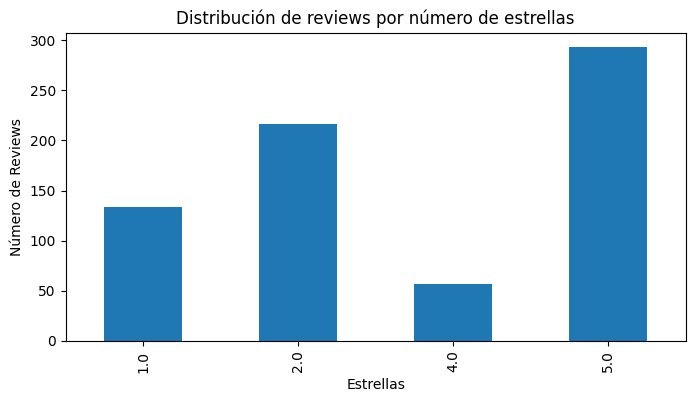

In [16]:
df_plot = df_reviews['overall'].value_counts(sort=False).sort_index()
df_plot = df_plot.plot(kind='bar', title='Distribución de reviews por número de estrellas', xlabel='Estrellas', ylabel='Número de Reviews',figsize=(8, 4))

## 1.c. Nº de reviews positivas y negativas

In [17]:
print(f"Número total de reviews positivas: {len(df_reviews[df_reviews['overall']>3])}'")
print(f"Número total de reviews negativas: {len(df_reviews[df_reviews['overall']<3])}'")

Número total de reviews positivas: 350'
Número total de reviews negativas: 350'


## 1.d. N-grams más frecuentes

In [18]:
!pip install nltk

In [19]:
from nltk import ngrams
from nltk.probability import FreqDist

bigrams_ = list(ngrams(all_words, 2))
trigrams_ = list(ngrams(all_words, 3))

In [20]:
bigrams_freq = FreqDist(bigrams_)
trigrams_freq = FreqDist(trigrams_)

In [21]:
bigrams_freq.most_common(10)

[(('.', 'I'), 884),
 (('of', 'the'), 581),
 ((',', 'and'), 524),
 (('.', 'The'), 516),
 (('this', 'book'), 432),
 (('in', 'the'), 344),
 ((',', 'but'), 339),
 (('.', 'It'), 311),
 (('the', 'book'), 282),
 ((',', 'I'), 272)]

In [22]:
trigrams_freq.most_common(10)

[(('this', 'book', '.'), 92),
 (('.', 'This', 'book'), 74),
 (('.', 'It', 'is'), 68),
 (('.', 'It', "'s"), 63),
 (('.', 'This', 'is'), 61),
 ((',', 'and', 'the'), 56),
 (('of', 'the', 'book'), 55),
 (('I', 'do', "n't"), 53),
 (('.', 'It', 'was'), 52),
 ((',', 'and', 'I'), 51)]

## 1.e. Nubes de palabras

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

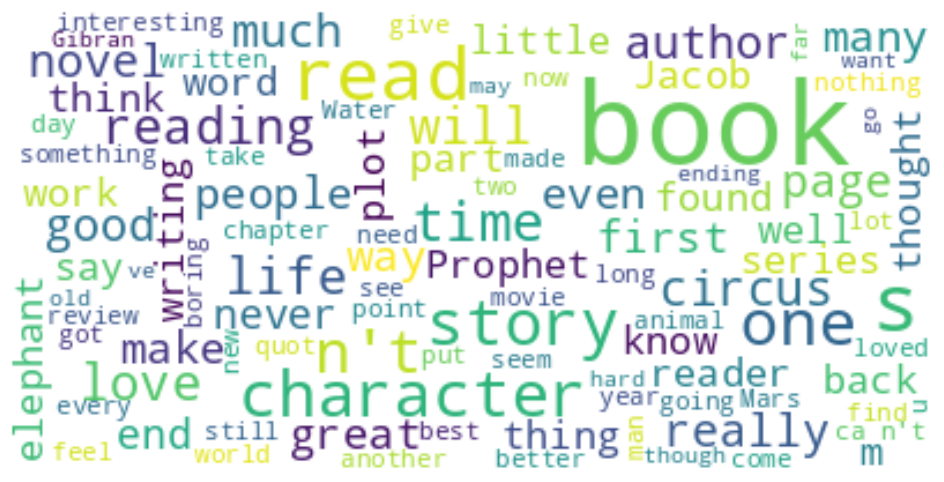

In [24]:
plot_word_cloud(all_words)

## 1.f. Conclusiones

El análisis exploratorio se ha ejecutado con la ayuda de algunas herramientas de visualización, n-gramas, nubes de palabras, etc.
Todas ellas son muy útiles para hacernos una idea del dataset con el que estamos trabajando.
No obstante, algunas herramientas no han sido todo lo efectivas que podrían ser, ya que al tratar los datos en bruto (sin haber sido preprocesados) nos encontramos con mucho ruido durante la exploración.
Por ello, a continuación se va a proceder al preprocesamiento de los datos y a su limpieza mediante lematización, eliminación de stop words y otras herramientas.